In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/emails.csv",sep =";", nrows = 1000)
df

,from,to,cc,subject,date,body
0,monique.sanchez@enron.com,"sanchez@enron.com, ksanchez@houstonisd.org",NaN,RE: Response requested,"Wed, 2 May 2001 16:28:00 -0700 (PDT)",just Associate.....at Enron Wholesale Services...
1,monique.sanchez@enron.com,scottatlas@yahoo.com,NaN,RE: Reminder,"Wed, 10 Oct 2001 14:51:35 -0700 (PDT)",I would wear nice slacks and a nice shirt...ma...
2,monique.sanchez@enron.com,rosie.m.gonzalez@chase.com,NaN,RE: testing,"Wed, 23 May 2001 12:40:57 -0700 (PDT)",I'm glad you remembered my email. Glad to see...
3,monique.sanchez@enron.com,joseph.f.reid@accenture.com,NaN,Re: you can't hide...,"Mon, 14 May 2001 14:53:00 -0700 (PDT)","Hey there,\n\nDid you call me at the Derby? I..."
4,monique.sanchez@enron.com,moshuffle@hotmail.com,NaN,FW: Tuesday's P/L,"Wed, 30 May 2001 06:49:31 -0700 (PDT)","\n\n -----Original Message-----\nFrom: \tBike,..."
...,...,...,...,...,...,...
995,tracy.geaccone@enron.com,sheila.howard@enron.com,"karl.jackson@enron.com, shawn.franks@enron.com...",Re: EOTT December data,"Mon, 5 Feb 2001 18:06:00 -0800 (PST)","In the future, please work with Jennifer Lev's..."
996,tracy.geaccone@enron.com,traci.rainbow@enron.com,NaN,AA PBC Requests for 10-K,"Mon, 29 Jan 2001 20:36:00 -0800 (PST)","EOTT, MLP YTD estimate 12/31/00 $13.0\nEnron..."
997,tracy.geaccone@enron.com,sophie.patel@enron.com,NaN,Re: FW: Order for Tracy Geaccone,"Mon, 29 Jan 2001 15:45:00 -0800 (PST)",I don't think I will be able to make it. I ta...
998,tracy.geaccone@enron.com,kimberly.nelson@enron.com,NaN,Re: Enron Corp: Info Needed!,"Tue, 6 Feb 2001 18:00:00 -0800 (PST)",have you tried this? my schedule feeds this?\...


In [3]:
df.isnull().sum() * 100 / len(df)

from        0.0
to          9.2
cc         81.6
subject     1.6
date        0.0
body        0.0
dtype: float64

In [4]:
df.duplicated().sum()

18

In [5]:
df = df.drop_duplicates()

In [6]:
email_body = df["body"]
email_body

0      just Associate.....at Enron Wholesale Services...
1      I would wear nice slacks and a nice shirt...ma...
2      I'm glad you remembered my email.  Glad to see...
3      Hey there,\n\nDid you call me at the Derby?  I...
4      \n\n -----Original Message-----\nFrom: \tBike,...
                             ...                        
995    In the future, please work with Jennifer Lev's...
996    EOTT, MLP YTD estimate 12/31/00   $13.0\nEnron...
997    I don't think I will be able to make it.  I ta...
998    have you tried this?  my schedule feeds this?\...
999    I will let you know when I have the company se...
Name: body, Length: 982, dtype: object

### data Preprocessing 

In [7]:
# Import all libraries 
import gensim
import gensim.corpora as corpora 
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel 

In [8]:
import spacy 
import nlp 

/home/becode2/Desktop/Clustering_Enron/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Convert email body  to list : create list of messages 
data = email_body.values.tolist()
len(data)                       # check length of list is sames no. of rows in dataset : correct 

982

In [10]:
# Breakdown each sentence into a list of words : tokenize 
def sent_to_words(sentences): 
    for sentence in sentences: 
        yield(simple_preprocess(str(sentence), deacc = True))  # deacc = True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[3])




['hey', 'there', 'did', 'you', 'call', 'me', 'at', 'the', 'derby', 'have', 'some', 'vague', 'recollection', 'of', 'getting', 'voice', 'mail', 'from', 'you', 'however', 'had', 'many', 'many', 'mint', 'juleps', 'and', 'was', 'very', 'intoxicated', 'actually', 'flew', 'in', 'on', 'saturday', 'and', 'out', 'sunday', 'morning', 'was', 'maybe', 'there', 'hrs', 'tops', 'anyway', 'guess', 'you', 'were', 'here', 'this', 'weekend', 'hope', 'everything', 'went', 'well', 'give', 'me', 'call', 'anytime', 'if', 'you', 'like', 'to', 'talk', 'will', 'be', 'home', 'solo', 'for', 'the', 'next', 'weekends', 'great', 'time', 'to', 'chit', 'chat', 'hopefully', 'will', 'talk', 'to', 'you', 'soon', 'take', 'care', 'mo']


In [11]:
from gensim.models.phrases import Phrases, Phraser 

# BUild the bigram and trigrams models 
bigram = Phrases(data_words, min_count = 5, threshold = 100)

trigram = Phrases(bigram[data_words], threshold = 100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# print(trigram_mod[bigram_mod[data_words[200]]])

In [12]:
# Lemmatization 
import nlp 

import spacy
nlp = spacy.load("en_core_web_sm")

In [13]:
# prep NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use''ect', 'hou', 'com', 'recipient', 'sent', 'enron', 'cc', 'subject',\
                                         'forwarded', 'corp', 'said', 'attached', 'ect',\
                                         'recipient', 'email', 'original', 'doc', 'pm', 'mail', 'message', 'new'\
                                         'enronxgate', 'na', 'year'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/becode2/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:


# remove stop_words, make bigrams and lemmatize
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out



In [15]:


# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)



# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)



# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])



In [48]:
print(data_lemmatized[200])


982
['lunch', 'calendar', 'invite', 'ews', 'brown', 'bag', 'lunch', 'series', 'feature', 'map', 'guy', 'topic', 'visualize', 'datum', 'marketplace', 'enhance', 'market', 'analysis', 'decision', 'make', 'capability', 'commodity', 'specific', 'geographic', 'information', 'customize', 'application', 'bring', 'lunch', 'rsvp', 'provide', 'drink']


In [17]:
# create dictionary and corpus both are needed for (LDA) topic modeling

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [18]:


# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=200,
                                           random_state=100,
                                           update_every=0,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           per_word_topics=True,
                                           minimum_phi_value=0.1)



In [19]:

print(len(lda_model.show_topics()))
lda_model.show_topics()



10


[(190,
  '0.027*"report" + 0.027*"statistical" + 0.022*"get" + 0.021*"draft" + 0.019*"memo" + 0.015*"thank" + 0.014*"contract" + 0.014*"know" + 0.014*"investor" + 0.014*"question"'),
 (82,
  '0.034*"go" + 0.031*"accenture" + 0.030*"call" + 0.029*"designate" + 0.027*"confidential_information" + 0.027*"error" + 0.027*"privileged" + 0.027*"may_contain" + 0.027*"sender_immediately" + 0.027*"notify"'),
 (145,
  '0.058*"nytime" + 0.053*"todaysheadline" + 0.017*"page" + 0.016*"index" + 0.009*"http" + 0.008*"business" + 0.006*"politic" + 0.006*"art" + 0.006*"technology" + 0.006*"new"'),
 (149,
  '0.033*"company" + 0.026*"position" + 0.025*"name" + 0.024*"transfer" + 0.024*"et" + 0.020*"send" + 0.017*"new" + 0.017*"employee" + 0.016*"old" + 0.016*"person"'),
 (125,
  '0.006*"nid_target" + 0.006*"new" + 0.005*"provide" + 0.004*"nytime" + 0.004*"service" + 0.004*"todaysheadline" + 0.004*"ee" + 0.004*"electric" + 0.003*"business" + 0.003*"utility"'),
 (13,
  '0.039*"gpgfin" + 0.024*"mshaenchen" + 

In [20]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))


Perplexity:  -9.195377548512294


In [21]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3913243182264081


In [54]:
#What is the Dominant topic and its percentage contribution in each document
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
 # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic = df_topic_sents_keywords
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

/tmp/ipykernel_4574/4168683273.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/tmp/ipykernel_4574/4168683273.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


ValueError: Length mismatch: Expected axis has 4 elements, new values have 5 elements

In [53]:
val = 120
print(df_dominant_topic['Text'].loc[df_dominant_topic['Document_No'] == val].values[0])
df['body'][val]

#df_topic_sents_keywords
#df_dominant_topic.tail(50)


['embed', 'word', 'document']


'Here is the address and phone number(s) for Mike (Woodsy) Bishop in Munich.\n\nWidenmayerstr. 46\n80538 Munich\n\nHome:   011-49-89-2157-8951\nMobile:  011-49-179-515-7409\n\nWe fly out on Thursday at 6:50 PM on Air France #035\nWe return on Saturday at 4:25 PM on Air France #034'

In [82]:
print(len(df_dominant_topic['Dominant_Topic'].value_counts()))

df_dominant_topic['Dominant_Topic'].value_counts()

90


11.0     598
21.0     596
118.0    362
109.0    337
66.0     335
        ... 
13.0       2
199.0      2
57.0       2
94.0       1
16.0       1
Name: Dominant_Topic, Length: 90, dtype: int64

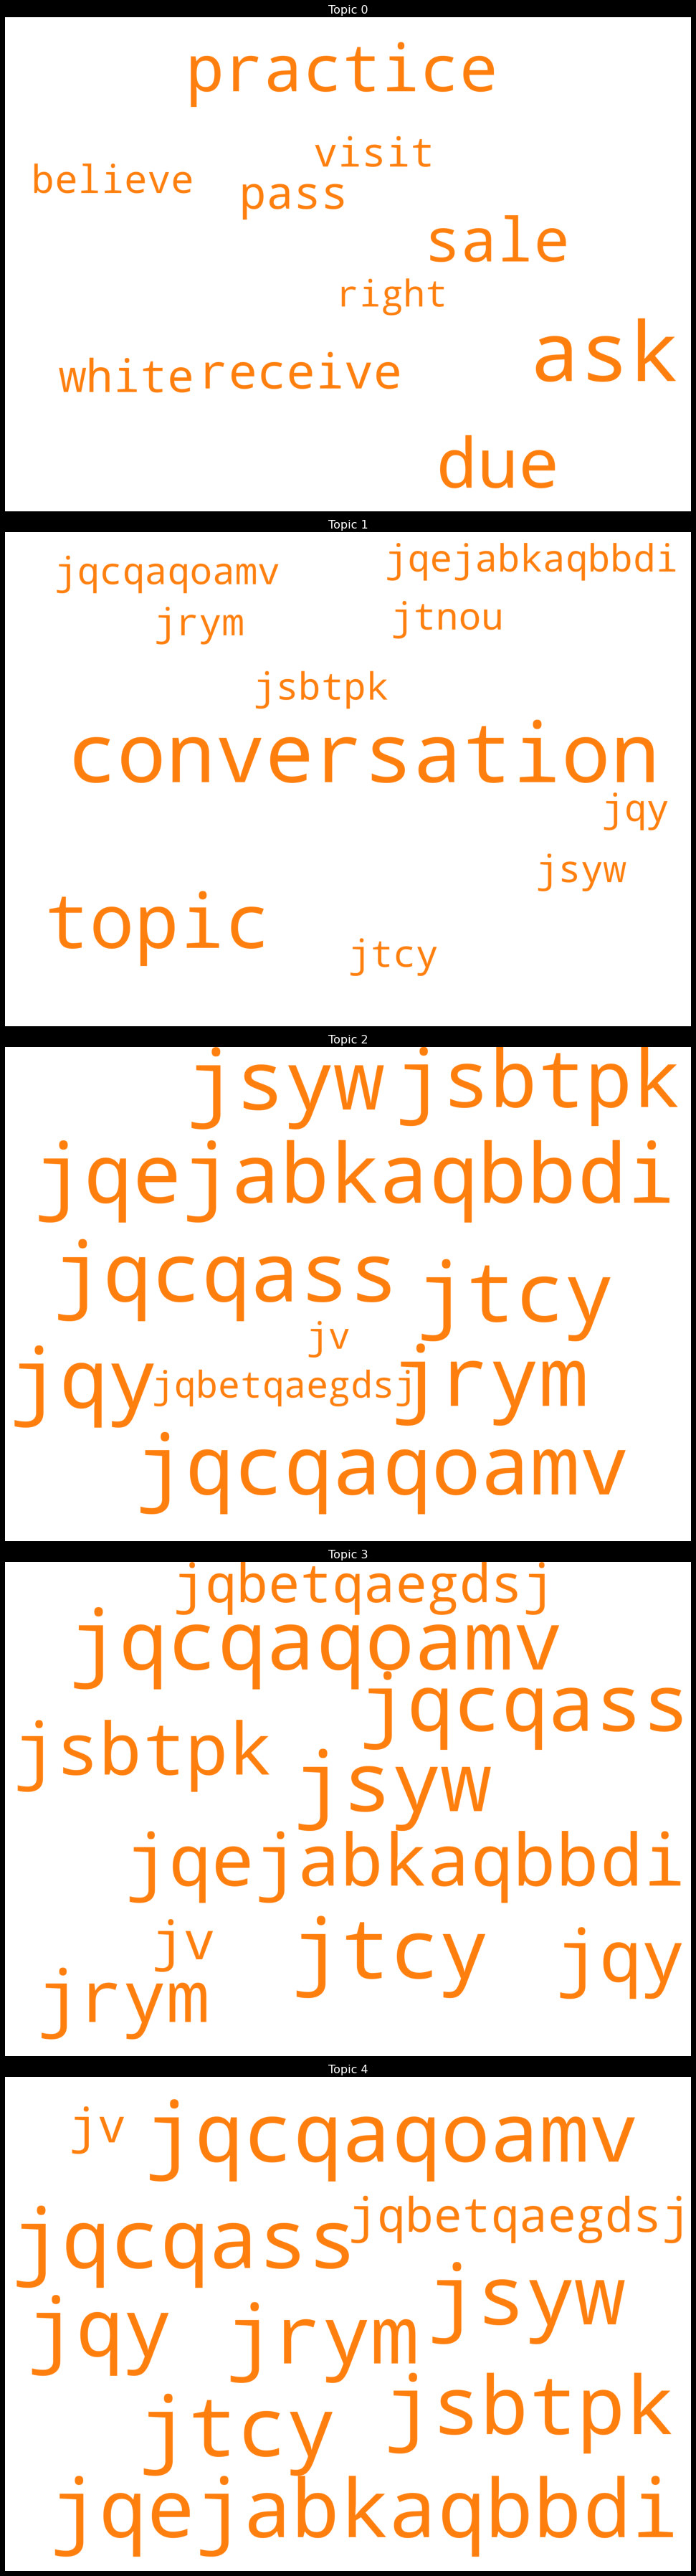

In [83]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[1],
                  prefer_horizontal=1.0)

num_topics=len(df_dominant_topic['Dominant_Topic'].value_counts())
topics = lda_model.show_topics(formatted=False, num_topics=num_topics)

fig, axes = plt.subplots(5, 1, figsize=(50,50), sharex=True, sharey=True)


for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

/tmp/ipykernel_14428/2246158447.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


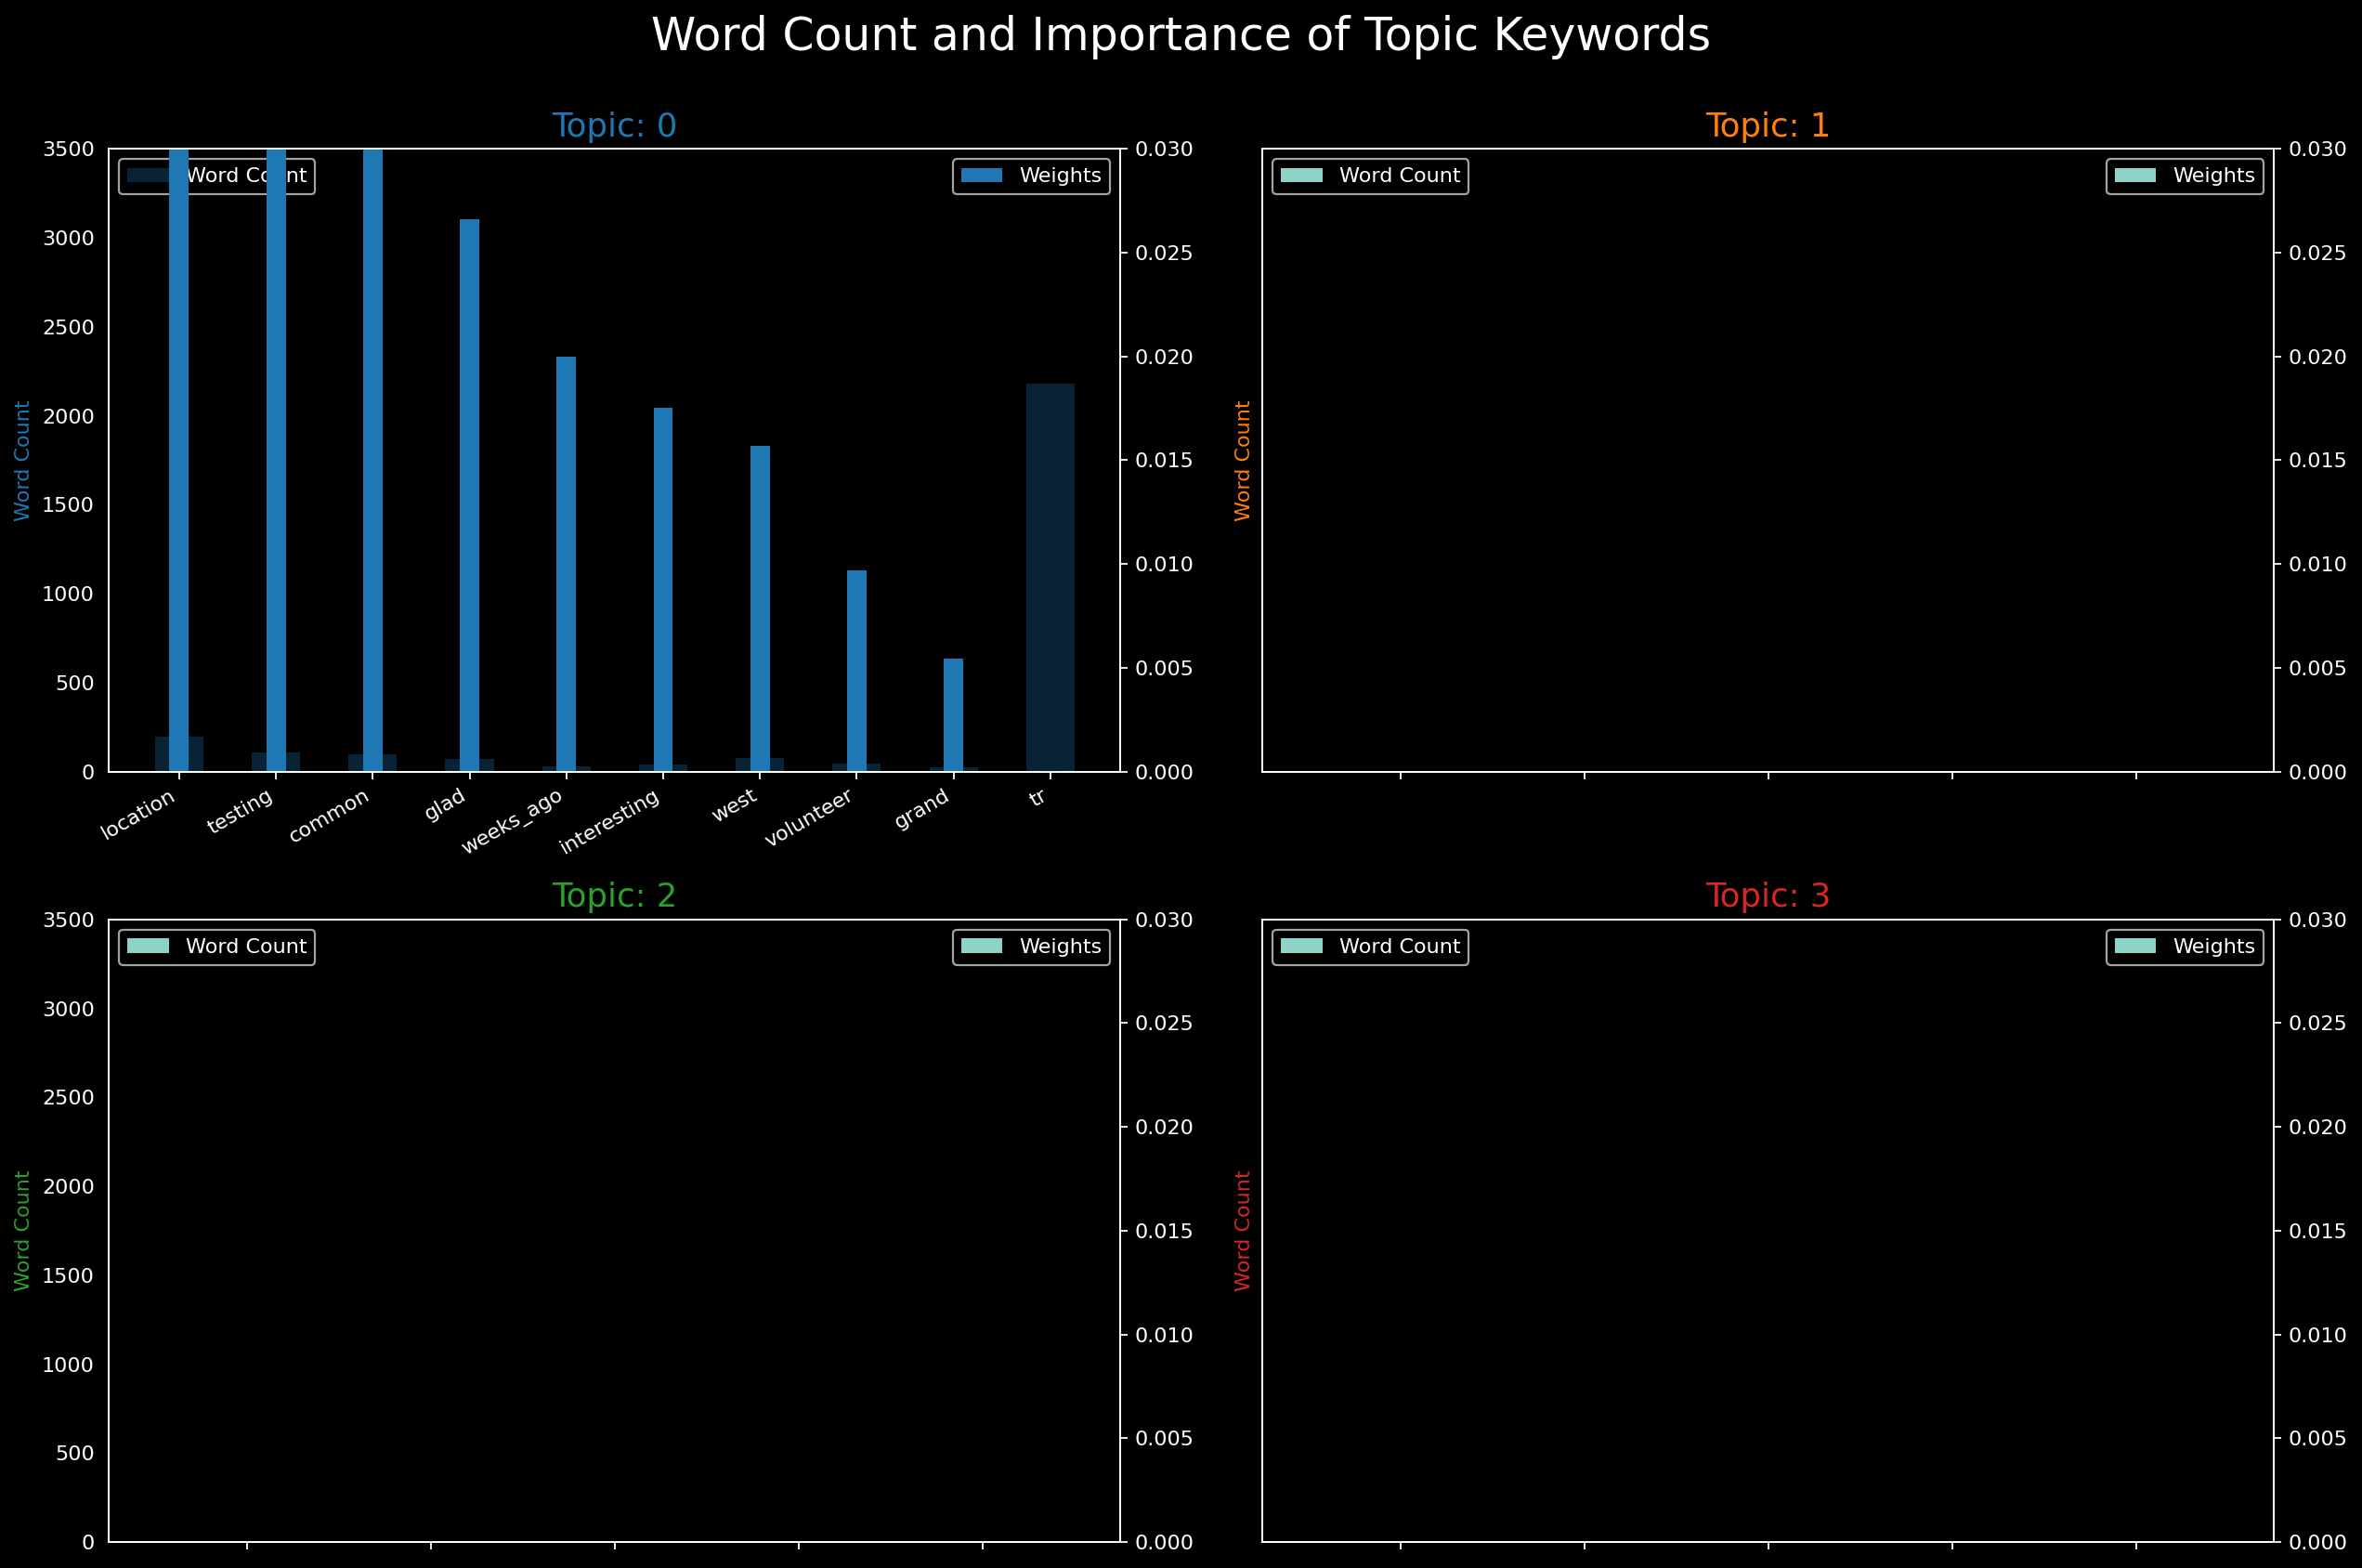

In [57]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [ ]:
# def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
#     """
#     Compute c_v coherence for various number of topics

#     Parameters:
#     ----------
#     dictionary : Gensim dictionary
#     corpus : Gensim corpus
#     texts : List of input texts
#     limit : Max num of topics

#     Returns:
#     -------
#     model_list : List of LDA topic models
#     coherence_values : Coherence values corresponding to the LDA model with respective number of topics
#     """
#     coherence_values = []
#     model_list = []
#     for num_topics in range(start, limit, step):
#         model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=num_topics,
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha='auto',
#                                            per_word_topics=True)
#         model_list.append(model)
#         coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
#         coherence_values.append(coherencemodel.get_coherence())

#     return model_list, coherence_values


In [ ]:
# run
# model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=40, limit=100, step=6)



In [ ]:
import matplotlib.pyplot as plt

# # Show graph
# limit=100; start=40; step=6;
# x = range(start, limit, step)
# plt.plot(x, coherence_values)
# plt.xlabel("Num Topics")
# plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
# plt.show()



In [ ]:


# Print the coherence scores
# for m, cv in zip(x, coherence_values):
#     print("Num Topics =", m, " has Coherence Value of", round(cv, 4))



In [ ]:
# run
# model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=90, limit=150, step=6)

In [ ]:
# Show graph
# limit=150; start=90; step=6;
# x = range(start, limit, step)
# plt.plot(x, coherence_values)
# plt.xlabel("Num Topics")
# plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
# plt.show()

In [ ]:
 # 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
# import pyLDAvis

# import matplotlib.pyplot as plt 
# import nltk

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis 

# import warnings
# try:
#     import pyLDAvis.gensim_models as gensimvis
#     CAN_VISUALIZE = True
#     pyLDAvis.enable_notebook()
#     from IPython.display import display
# except ImportError:
#     ValueError("SKIP: please install pyLDAvis")
#     CAN_VISUALIZE = False
# warnings.filterwarnings('ignore')
# %matplotlib inline




pyLDAvis.enable_notebook(sort=True)
vis = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)
